In [12]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Load Montgomery data into the dataframe.
montgomery_df = pd.read_csv(os.path.join('..', 'csv_data', 'house_info_school_assignments_dropna_transform.csv'))
montgomery_df

,price,dateSold,bathrooms,bedrooms,livingArea,homeType,lotAreaValue,zipcode,elem,middle,high,AgeYears
0,800000,Q3_2021,4.0,5.0,3650.0,SINGLE_FAMILY,222156.000000,20854,wayside elementary,herbert hoover middle,winston churchill high,42.0
1,800000,Q2_2021,1.0,2.0,1400.0,SINGLE_FAMILY,10890.000000,20814,kensington parkwood elementary,tilden middle,walter johnson high,106.0
2,800000,Q3_2020,3.0,4.0,1826.0,SINGLE_FAMILY,9148.000000,20817,bethesda elementary,tilden middle,walt whitman high,65.0
3,800000,Q2_2021,3.0,4.0,2810.0,SINGLE_FAMILY,9811.000000,20854,ritchie park elementary,cabin john middle,winston churchill high,56.0
4,800000,Q1_2021,2.0,5.0,2115.0,SINGLE_FAMILY,16521.999987,20815,bethesda elementary,thomas w. pyle middle,albert einstein high,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9667,358000,Q2_2021,4.0,3.0,1762.0,TOWNHOUSE,1800.000000,20882,woodfield elementary,hallie wells middle,clarksburg high,34.0
9668,358000,Q2_2021,3.0,3.0,1673.0,TOWNHOUSE,2001.000000,20879,strawberry knoll elementary,gaithersburg middle,gaithersburg high,42.0
9669,358500,Q1_2021,4.0,5.0,1386.0,TOWNHOUSE,1650.000000,20877,flower hill elementary,gaithersburg middle,gaithersburg high,37.0
9670,358888,Q2_2021,3.0,3.0,1420.0,TOWNHOUSE,2160.000000,20878,summit hall elementary,lakelands park middle,gaithersburg high,35.0


In [14]:
# Load school ratings data.
mcps_school_df = pd.read_csv(os.path.join('..', 'csv_data', 'mcps_school_ratings_clean.csv'))

# Keep only the school name and rating.
mcps_school_df = mcps_school_df[['School', 'Rating']]

In [15]:
montgomery_df = montgomery_df.merge(mcps_school_df, left_on='elem', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'elemRating'})
montgomery_df = montgomery_df.drop(columns=['elem', 'School'])

montgomery_df = montgomery_df.merge(mcps_school_df, left_on='middle', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'middleRating'})
montgomery_df = montgomery_df.drop(columns=['middle', 'School'])

montgomery_df = montgomery_df.merge(mcps_school_df, left_on='high', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'highRating'})
montgomery_df = montgomery_df.drop(columns=['high', 'School'])

In [16]:
# Load zip code data.
zip_df = pd.read_csv(os.path.join('..', 'csv_data', 'md_zip_tabulations_clean.csv'))
zip_df

,Census 5-Digit ZCTA Code,Percent Non Hispanic White,Percent Non Hispanic Black,Percent non Hispanic Asian,Percent Hispanic
0,20601,40.5,46.1,3.6,5.3
1,20602,33.9,52.3,2.9,6.1
2,20603,33.2,51.9,5.0,5.5
3,20606,87.5,10.4,0.9,0.9
4,20607,22.1,64.5,5.7,4.9
...,...,...,...,...,...
408,21918,95.6,1.3,0.7,1.1
409,21919,95.8,1.2,0.2,1.2
410,21920,88.7,6.6,0.0,0.8
411,21921,82.5,8.9,1.5,4.5


In [17]:
montgomery_df = montgomery_df.merge(zip_df, left_on='zipcode', right_on='Census 5-Digit ZCTA Code')
montgomery_df = montgomery_df.rename(columns={'Percent Non Hispanic White': 'percentWhite',
                                              'Percent Non Hispanic Black': 'percentBlack',
                                              'Percent non Hispanic Asian': 'percentAsian',
                                              'Percent Hispanic': 'percentHispanic'})
montgomery_df = montgomery_df.drop(columns=['zipcode', 'Census 5-Digit ZCTA Code'])
montgomery_df

,price,dateSold,bathrooms,bedrooms,livingArea,homeType,lotAreaValue,AgeYears,elemRating,middleRating,highRating,percentWhite,percentBlack,percentAsian,percentHispanic
0,800000,Q3_2021,4.0,5.0,3650.0,SINGLE_FAMILY,222156.000000,42.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5
1,802909,Q3_2020,2.0,5.0,2188.0,SINGLE_FAMILY,77513.999999,54.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5
2,1120000,Q3_2020,6.0,5.0,5399.0,SINGLE_FAMILY,111949.000016,43.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5
3,1150000,Q3_2020,5.0,5.0,5168.0,SINGLE_FAMILY,145054.999984,68.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5
4,1300000,Q1_2021,3.0,4.0,2062.0,SINGLE_FAMILY,87120.000000,62.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,675000,Q3_2021,4.0,5.0,3846.0,SINGLE_FAMILY,30771.000014,23.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8
9668,650000,Q2_2021,3.0,3.0,2594.0,SINGLE_FAMILY,267894.000000,76.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8
9669,1250000,Q2_2021,7.0,7.0,8170.0,SINGLE_FAMILY,87991.000016,16.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8
9670,745000,Q1_2021,4.0,5.0,5300.0,SINGLE_FAMILY,87991.000016,21.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8


In [18]:
# homeType and dateSold are categorical variable. Create dummy variables.
montgomery_df = pd.get_dummies(montgomery_df, columns=["homeType"])
montgomery_df = pd.get_dummies(montgomery_df, columns=["dateSold"])
montgomery_df = montgomery_df.dropna()
montgomery_df

,price,bathrooms,bedrooms,livingArea,lotAreaValue,AgeYears,elemRating,middleRating,highRating,percentWhite,percentBlack,percentAsian,percentHispanic,homeType_CONDO,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,dateSold_Q1_2021,dateSold_Q2_2021,dateSold_Q3_2020,dateSold_Q3_2021
0,800000,4.0,5.0,3650.0,222156.000000,42.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5,0,1,0,0,0,0,1
1,802909,2.0,5.0,2188.0,77513.999999,54.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5,0,1,0,0,0,1,0
2,1120000,6.0,5.0,5399.0,111949.000016,43.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5,0,1,0,0,0,1,0
3,1150000,5.0,5.0,5168.0,145054.999984,68.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5,0,1,0,0,0,1,0
4,1300000,3.0,4.0,2062.0,87120.000000,62.0,8.0,9.0,8.0,69.0,4.5,18.2,5.5,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,675000,4.0,5.0,3846.0,30771.000014,23.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8,0,1,0,0,0,0,1
9668,650000,3.0,3.0,2594.0,267894.000000,76.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8,0,1,0,0,1,0,0
9669,1250000,7.0,7.0,8170.0,87991.000016,16.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8,0,1,0,0,1,0,0
9670,745000,4.0,5.0,5300.0,87991.000016,21.0,6.0,4.0,5.0,30.4,42.6,9.0,14.8,0,1,0,1,0,0,0


In [19]:
# Separate features and target.
X = montgomery_df.drop(columns=['price'])
Y = montgomery_df['price']
print (f'Separating features and target: {X.shape} | {Y.shape}')

Separating features and target: (9530, 19) | (9530,)


In [20]:
# Split data into training and testing sets. 80% data is used for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)
print(f'After splitting data: X train:{X_train.shape}, Y train: {Y_train.shape}, \
X test: {X_test.shape}, Y test: {Y_test.shape}')

After splitting data: X train:(7624, 19), Y train: (7624,), X test: (1906, 19), Y test: (1906,)


In [21]:
# Instantiate a linear regression model and fit on training dataset.
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [22]:
# Make predictions on testing data.
Y_pred = lin_model.predict(X_test)

In [23]:
# Print the model coefficients.
print (f'Model intercept: {lin_model.intercept_}, Model coefficients: {lin_model.coef_}')

Model intercept: -2939828.4606804815, Model coefficients: [ 6.77026063e+04  6.74294328e+03  1.24055120e+02 -2.62708490e-04
  1.76028450e+03  3.84781065e+03  3.15780493e+03  5.22904316e+04
  2.82621980e+04  2.32245573e+04  2.10520569e+04  2.72282693e+04
 -1.85679434e+05  1.34550620e+05  5.11288141e+04 -1.75991480e+04
  2.88958818e+04 -3.92981290e+04  2.80013953e+04]


In [24]:
# Print RMSE and accuracy.

# The mean squared error
print (f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')

# Model accuracy:
print (f'Training accuracy: {lin_model.score(X_train, Y_train):.2f}')
print (f'Testing accuracy: {lin_model.score(X_test, Y_test):.2f}')

Mean squared error: 35118223402.45
Training accuracy: 0.78
Testing accuracy: 0.78


In [25]:
# The sklearn linear model fit doesn't give p-value information. To get this info and display
# it in a table, we will use statsmodels instead. 
# Source: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)
lin_mod = sm.OLS(Y_train,X2_train)

fii = lin_mod.fit()
summary = fii.summary2()
print (summary)

                              Results: Ordinary least squares
Model:                       OLS                     Adj. R-squared:            0.776      
Dependent Variable:          price                   AIC:                       206805.3536
Date:                        2021-09-25 18:47        BIC:                       206930.2566
No. Observations:            7624                    Log-Likelihood:            -1.0338e+05
Df Model:                    17                      F-statistic:               1557.      
Df Residuals:                7606                    Prob (F-statistic):        0.00       
R-squared:                   0.777                   Scale:                     3.5236e+10 
-------------------------------------------------------------------------------------------
                           Coef.       Std.Err.     t    P>|t|      [0.025        0.975]   
-------------------------------------------------------------------------------------------
const             

In [26]:
# Now, instantiate the Random Forrest model.

# Test out different random forrest models accuracy against different number of estimators.

x_val = []
y_val = []

for n in range(3, 31):
    rf_model = RandomForestRegressor(criterion='mae', n_estimators=n, random_state=50)
    rf_model = rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    
    x_val.append(n)
    y_val.append(rf_model.score(X_test, Y_test))

    # The mean squared error
    print (f'n {n} | MSE {mean_squared_error(Y_test, Y_pred):.2f} | \
    Training Accuracy {rf_model.score(X_train, Y_train):.2f} | Testing Accuracy {rf_model.score(X_test, Y_test):.2f}')


n 3 | MSE 24372018806.04 |     Training Accuracy 0.96 | Testing Accuracy 0.85
n 4 | MSE 21386617738.42 |     Training Accuracy 0.97 | Testing Accuracy 0.87
n 5 | MSE 19854420021.11 |     Training Accuracy 0.97 | Testing Accuracy 0.88
n 6 | MSE 18601560751.67 |     Training Accuracy 0.98 | Testing Accuracy 0.88
n 7 | MSE 18354772969.20 |     Training Accuracy 0.98 | Testing Accuracy 0.89
n 8 | MSE 17975322285.90 |     Training Accuracy 0.98 | Testing Accuracy 0.89
n 9 | MSE 17666257262.09 |     Training Accuracy 0.98 | Testing Accuracy 0.89
n 10 | MSE 17619393114.63 |     Training Accuracy 0.98 | Testing Accuracy 0.89
n 11 | MSE 17493396370.34 |     Training Accuracy 0.98 | Testing Accuracy 0.89
n 12 | MSE 17354952947.70 |     Training Accuracy 0.98 | Testing Accuracy 0.89
n 13 | MSE 17175321926.29 |     Training Accuracy 0.98 | Testing Accuracy 0.89
n 14 | MSE 16820091174.09 |     Training Accuracy 0.98 | Testing Accuracy 0.90
n 15 | MSE 16853199779.23 |     Training Accuracy 0.98 | Te

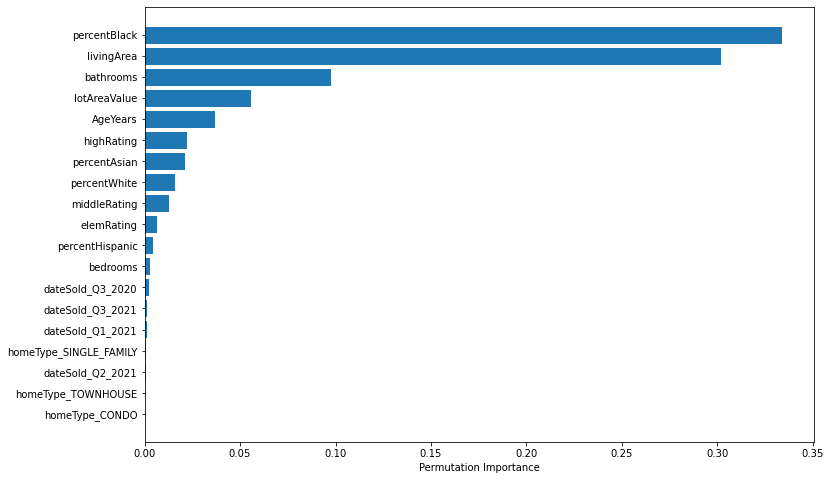

In [27]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

perm_importance = permutation_importance(rf_model, X_test, Y_test)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.gca().invert_yaxis()

<AxesSubplot:xlabel='x'>

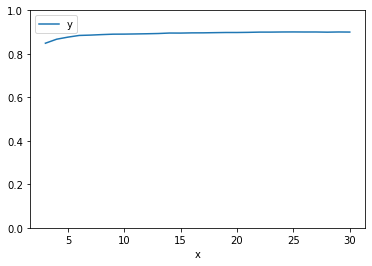

In [28]:
df = pd.DataFrame(list(zip(x_val, y_val)), columns =['x', 'y'])
df.plot.line(x='x', y='y', ylim=(0, 1.0))

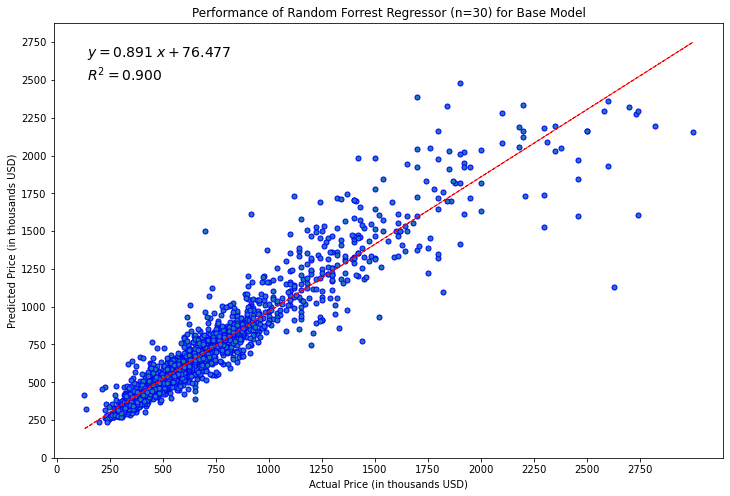

In [29]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

x = Y_test/1000
y = Y_pred/1000

plt.figure(figsize=(12,8))

plt.plot(x,y,".", ms=10, mec="b")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.ylabel('Predicted Price (in thousands USD)')
plt.xlabel('Actual Price (in thousands USD)')
plt.title('Performance of Random Forrest Regressor (n=30) for Base Model')

plt.xticks(np.arange(0, 3000, step=250))
plt.yticks(np.arange(0, 3000, step=250))

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Text(0.5, 1.0, 'Correlation Between House Price and Percent AA')

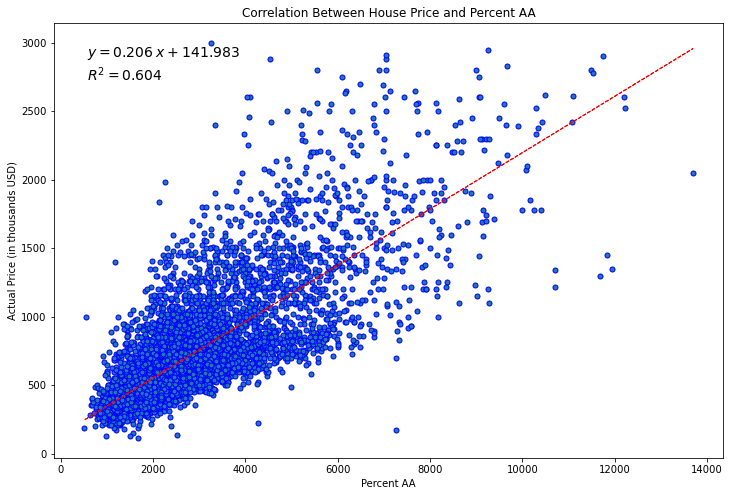

In [35]:
x = X_train['livingArea']
y = Y_train/1000

plt.figure(figsize=(12,8))

plt.plot(x,y,".", ms=10, mec="b")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.ylabel('Actual Price (in thousands USD)')
plt.xlabel('Percent AA')
plt.title('Correlation Between House Price and Percent AA')

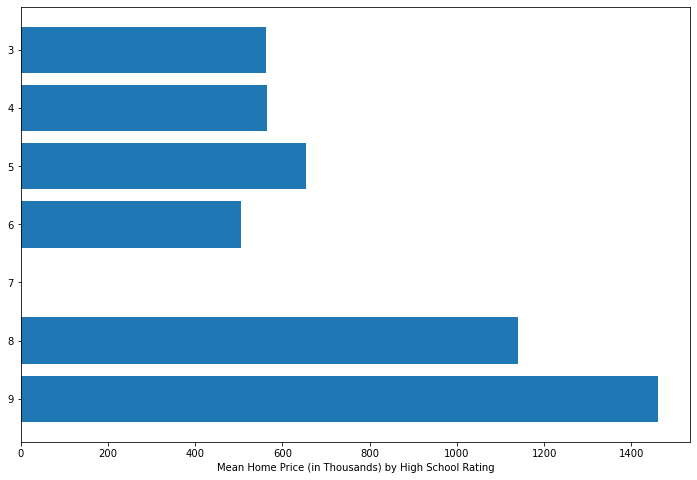

In [41]:
df = montgomery_df.groupby(['highRating']).mean()

plt.figure(figsize=(12,8))

plt.barh(df.index, df['price']/1000)
plt.xlabel("Mean Home Price (in Thousands) by High School Rating")
plt.gca().invert_yaxis()

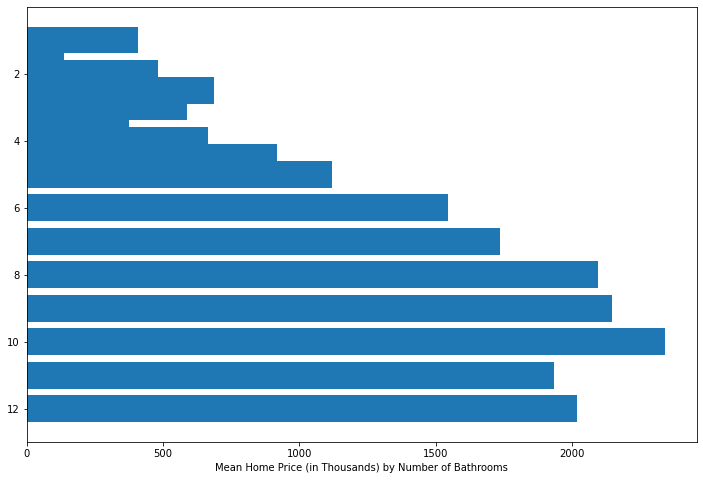

In [42]:
df = montgomery_df.groupby(['bathrooms']).mean()

plt.figure(figsize=(12,8))

plt.barh(df.index, df['price']/1000)
plt.xlabel("Mean Home Price (in Thousands) by Number of Bathrooms")
plt.gca().invert_yaxis()

In [60]:
# Find percent deviation of prediction.
df = pd.DataFrame(Y_test)
df = df.reset_index(drop=True)
df = df.rename(columns={"price": "Actual Price"})
df['Predicted Price'] = Y_pred.tolist()
df['Pct Deviation'] = (df['Predicted Price'] - df['Actual Price']) * 100/df['Actual Price']
df

,Actual Price,Predicted Price,Pct Deviation
0,675000,674216.666667,-0.116049
1,505000,442357.666667,-12.404422
2,499000,479376.666667,-3.932532
3,375000,326650.000000,-12.893333
4,345000,326455.000000,-5.375362
...,...,...,...
1901,865000,788945.600000,-8.792416
1902,360000,324346.366667,-9.903787
1903,360000,340869.333333,-5.314074
1904,690000,661966.666667,-4.062802


Text(0.5, 1.0, 'Percent Deviation of Predicted Price from Actual')

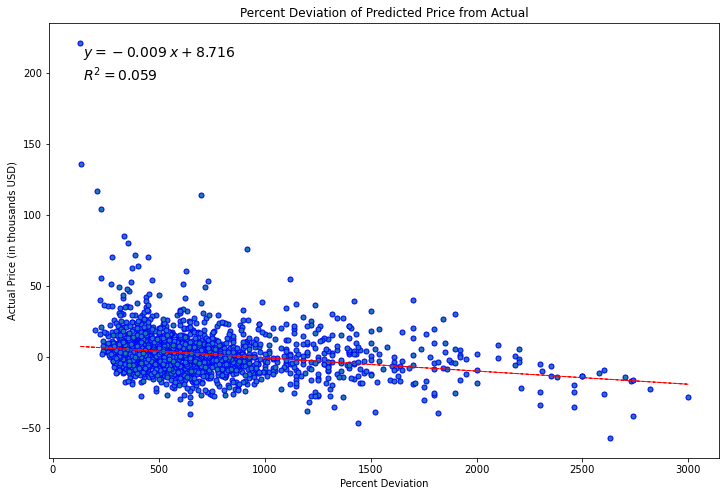

In [63]:
x = df['Actual Price']/1000
y = df['Pct Deviation']

plt.figure(figsize=(12,8))

plt.plot(x,y,".", ms=10, mec="b")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.ylabel('Actual Price (in thousands USD)')
plt.xlabel('Percent Deviation')
plt.title('Percent Deviation of Predicted Price from Actual')